# EDA

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


## Download dataset

In [25]:
!python ../src/data/make_dataset.py --save_path1 ../data/raw --save_path2 ../data/external/ --save_path3 ../data/interim/ 

File downloaded and unpacked successfully.
The downloaded file is not a zip archive.


## Data Description


The dataset is a subset of the ParaNMT corpus (50M sentence pairs). The filtered ParaNMT-detox corpus (500K sentence pairs) 


| Column | Type | Discription | 
| ----- | ------- | ---------- |
| reference | str | First item from the pair | 
| ref_tox | float | toxicity level of reference text | 
| translation | str | Second item from the pair - paraphrazed version of the reference|
| trn_tox | float | toxicity level of translation text |

In [14]:
df = pd.read_csv("../data/interim/filtered.csv", index_col=0)

df.head()

,reference,translation,ref_tox,trn_tox
5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.950956,0.035846
6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.999492,0.000131
7,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.963680,0.148710
11,"So now their spirits are cursed, walking back ...","their souls are cursed, they guard the paths, ...",0.842509,0.143992
13,"Come on, Cal, leave that shit alone.","come on, Cal, put it down.",0.999637,0.000279


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319142 entries, 5 to 577775
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    319142 non-null  object 
 1   translation  319142 non-null  object 
 2   ref_tox      319142 non-null  float64
 3   trn_tox      319142 non-null  float64
dtypes: float64(2), object(2)
memory usage: 12.2+ MB


In [16]:
print(df.describe())

             ref_tox        trn_tox
count  319142.000000  319142.000000
mean        0.944782       0.029132
std         0.097731       0.073331
min         0.500185       0.000033
25%         0.947804       0.000092
50%         0.986837       0.001310
75%         0.997905       0.018052
max         0.999724       0.499494


## Analyze the distribution of toxicity levels

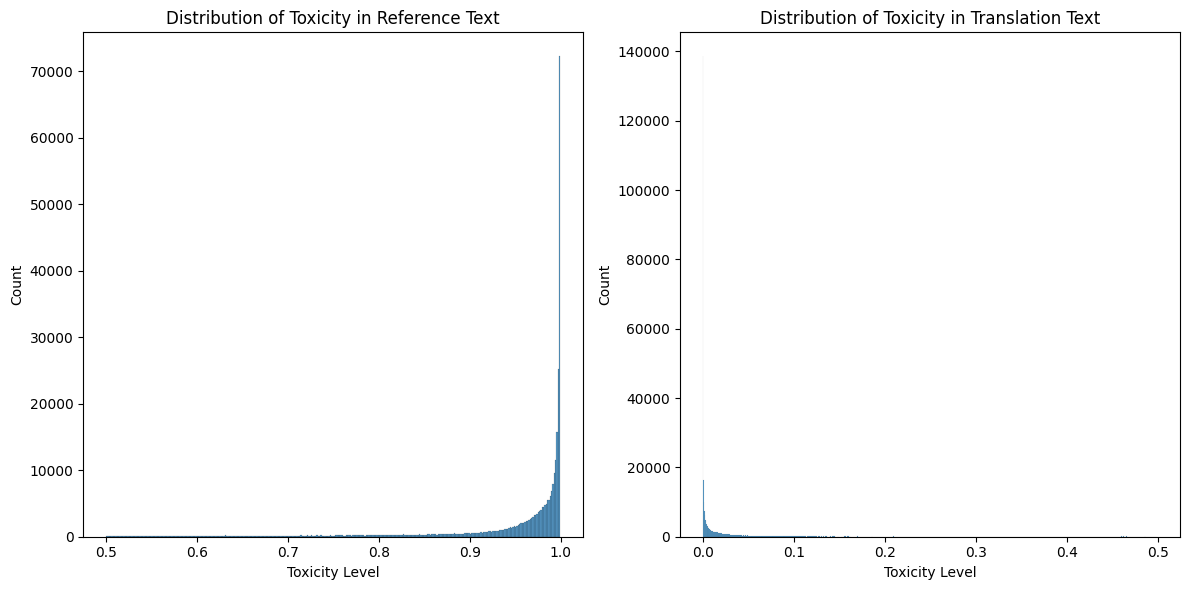

In [17]:
# Create histograms to visualize the distribution of toxicity levels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='ref_tox')
plt.title('Distribution of Toxicity in Reference Text')
plt.xlabel('Toxicity Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='trn_tox')
plt.title('Distribution of Toxicity in Translation Text')
plt.xlabel('Toxicity Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Analyze any patterns or relationships in the data:

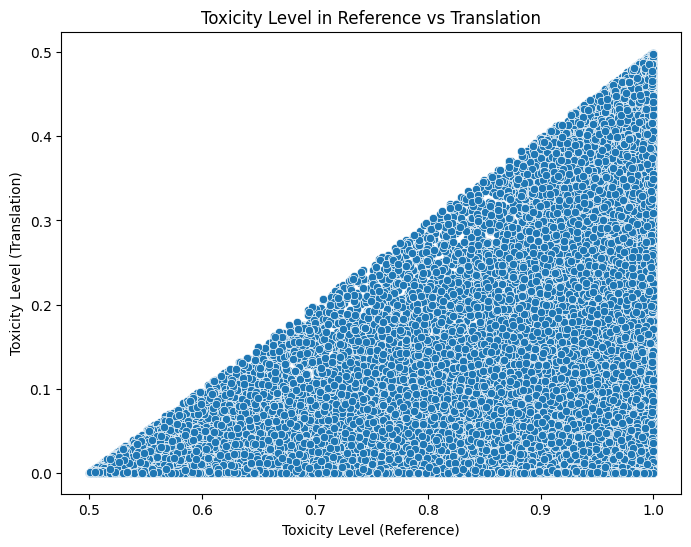

In [18]:
# Create a scatter plot to visualize any patterns or relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ref_tox', y='trn_tox')
plt.title('Toxicity Level in Reference vs Translation')
plt.xlabel('Toxicity Level (Reference)')
plt.ylabel('Toxicity Level (Translation)')
plt.show()


## Analise dataset for baseline model

### input file with toxis sentenses

In [1]:
import pandas as pd

# Assuming the text file is a CSV and the separator is a \t
df = pd.read_csv('../data/interim/reference.txt', sep='\t', header=None)

# View the first few rows
print(df.head())

                                                   0
0  I'm not gonna have a child... ...with the same...
1  They're all laughing at us, so we'll kick your...
2    Maine was very short on black people back then.
3  So now their spirits are cursed, walking back ...
4               Come on, Cal, leave that shit alone.


In [5]:
# Get summary statistics for numerical columns
print(df.describe())

                  0
count        319142
unique       287504
top     Get off me!
freq            163


### input file with "bad" words

In [6]:
# Assuming the text file is a CSV and the separator is a \t
df = pd.read_csv('../data/interim/bad_words.txt', sep='\t', header=None)

# View the first few rows
print(df.head())

                0
0  mound of venus
1        asslover
2             s&m
3           queaf
4      whitetrash


In [7]:
# Get summary statistics for numerical columns
print(df.describe())

                     0
count             1616
unique            1616
top     mound of venus
freq                 1


## Split dataset into train and test

In [6]:
test_df = pd.read_csv('../data/interim/test.csv', index_col=0)
train_df = pd.read_csv('../data/interim/train.csv', index_col=0)
val_df = pd.read_csv('../data/interim/validation.csv', index_col=0)
test_df.head()

,translation,ref_tox,trn_tox
reference,,,
"Walter put a lot ofgoddamn money in his billfold, that's why.","Walter brought him a lot of money, that's why.",0.945411,0.000038
Everybody nice and fucking comfy now?,are you all comfortable?,0.928767,0.000049
I feel like a jackass now.,now I'm gonna feel like a cow.,0.995424,0.323168
"Get out of here, you vultures!","get out of here, will you?",0.975508,0.001826
He could actually die here.,he could have died.,0.918354,0.004939


In [7]:
display(train_df.shape)
display(test_df.shape)
display(val_df.shape)

(204250, 3)

(63829, 3)

(51063, 3)